# Life Expectancy (WHO)

## 1-1. 문제 정의 및 가설 수립

* GDP가 낮은 국가일수록 기대수명이 낮을 것이다.
* 인류의 의학 기술과 문명의 발전으로 기대수명은 지금까지 증가했을 것이고 앞으로도 증가할것이다.
* 순수 알코올을 평균적으로 많이 섭치한 나라의 기대수명은 낮을 것이다.

## 1-2. 데이터 불러오기
* 데이터 출처 : https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [33]:
#!kaggle datasets download -d kumarajarshi/life-expectancy-who

In [34]:
#!tar -xvf life-expectancy-who.zip -C LifeExpectancy_Data

## 1-3. 데이터로드하기

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('./LifeExpectancy_Data/Life Expectancy Data.csv')
#df.loc[df.Country=='Republic of Korea'] -> 한국 데이터
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 1-4. 데이터 살펴보기

In [37]:
df.shape

(2938, 22)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [39]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [40]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## 1-5. EDA(탐색적 데이터분석)

### 1. GDP와 기대수명 관계

In [41]:
# 데이터의 년도 선정
df_2015 = df.loc[df.Year==2015]
df_2015

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [42]:
# 필요없는 데이터 삭제
df_2015.drop(['Status','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ',' BMI ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling'], axis=1, inplace=True)
df_2015.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,Year,Life expectancy,GDP
0,Afghanistan,2015,65.0,584.259210
16,Albania,2015,77.8,3954.227830
32,Algeria,2015,75.6,4132.762920
48,Angola,2015,52.4,3695.793748
64,Antigua and Barbuda,2015,76.4,13566.954100


In [43]:
# 결측값 확인
df_2015.isnull().sum()

Country              0
Year                 0
Life expectancy      0
GDP                 29
dtype: int64

In [44]:
# 결측값이 있는 데이터 삭제하기
df_2015.dropna(inplace=True)
df_2015.isnull().sum()

<ipython-input-44-d028c70b60e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015.dropna(inplace=True)


Country             0
Year                0
Life expectancy     0
GDP                 0
dtype: int64

In [45]:
# GDP 오름차순으로 인덱스 정렬
df_2015.sort_values(by='GDP', ascending=True,inplace=True)
df_2015.reset_index(inplace=True)
df_2015.head()

<ipython-input-45-225cfbf0b780>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015.sort_values(by='GDP', ascending=True,inplace=True)


,index,Country,Year,Life expectancy,GDP
0,416,Burundi,2015,59.6,33.681223
1,1554,Madagascar,2015,65.5,41.857595
2,144,Azerbaijan,2015,72.7,55.313820
3,2007,Peru,2015,75.5,63.343259
4,2151,Rwanda,2015,66.1,71.348397


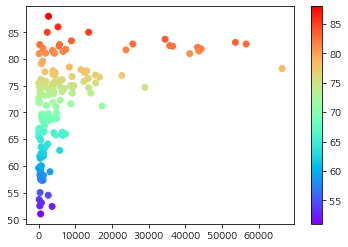

In [46]:
x = df_2015['GDP']
y = df_2015['Life expectancy ']
plt.scatter(x,y,c=y,cmap='rainbow')
plt.colorbar()
plt.show()

### "GDP가 낮은 국가일수록 기대수명이 낮을 것이다."는 옳지않다.
* GDP가 높은 나라는 대부분 기대수명이 높은편이다
* 하지만 위 그래프를 보면 GDP와 기대수명은 큰 관계가 없다는걸 알 수 있다.

### 2. 인류의 의학 기술과 문명의 발전으로 기대수명은 지금까지 증가했을 것이고 앞으로도 증가할것이다.

In [47]:
# 데이터 복제
df_life = df.drop(['Status','Alcohol','Adult Mortality','infant deaths','GDP','percentage expenditure','Hepatitis B','Measles ',' BMI ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling'], axis=1)
df_life

,Country,Year,Life expectancy
0,Afghanistan,2015,65.0
1,Afghanistan,2014,59.9
2,Afghanistan,2013,59.9
3,Afghanistan,2012,59.5
4,Afghanistan,2011,59.2
...,...,...,...
2933,Zimbabwe,2004,44.3
2934,Zimbabwe,2003,44.5
2935,Zimbabwe,2002,44.8
2936,Zimbabwe,2001,45.3


In [48]:
# 연도별 기대수명 평균값 구하기
data=[]
index=[]
for i in range(0,16):
    data.append(df_life.loc[df_life['Year']==(2000+i)]['Life expectancy '].mean())
    index.append((2000+i))
life_mean = pd.DataFrame(data,index,columns=['Life Mean'])
life_mean

,Life Mean
2000,66.750273
2001,67.128962
2002,67.351366
2003,67.433333
2004,67.646448
2005,68.209290
2006,68.667760
2007,69.036066
2008,69.427869
2009,69.938251


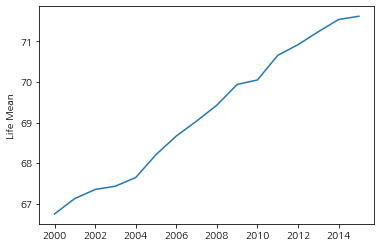

In [49]:
sns.lineplot(x=index,y=life_mean['Life Mean'],data=life_mean)
plt.show()

### "인류의 의학 기술과 문명의 발전으로 기대수명은 지금까지 증가했을 것이고 앞으로도 증가할것이다."는 맞다고 볼 수 있다.
* 그래프는 상승세를 보이고 있으므로 기대수명은 지금까지 증가했다.
* 그래프의 모양을 예측해보면 앞으로도 기대수명은 증가할것이라고 볼 수 있다.

### 3. 알코올과 기대수명의 관계

In [50]:
# 데이터 복제
df_alcohol = df
df_alcohol.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [51]:
# 필요없는 데이터 삭제
df_alcohol.drop(['Status','Adult Mortality','infant deaths','GDP','percentage expenditure','Hepatitis B','Measles ',' BMI ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling'], axis=1, inplace=True)
df_alcohol.head() 

,Country,Year,Life expectancy,Alcohol
0,Afghanistan,2015,65.0,0.01
1,Afghanistan,2014,59.9,0.01
2,Afghanistan,2013,59.9,0.01
3,Afghanistan,2012,59.5,0.01
4,Afghanistan,2011,59.2,0.01


In [52]:
# 결측값 확인
df_alcohol.isnull().sum()

Country               0
Year                  0
Life expectancy      10
Alcohol             194
dtype: int64

In [53]:
# 결측값 삭제
df_alcohol.dropna(inplace=True)
df_alcohol.isnull().sum()

Country             0
Year                0
Life expectancy     0
Alcohol             0
dtype: int64

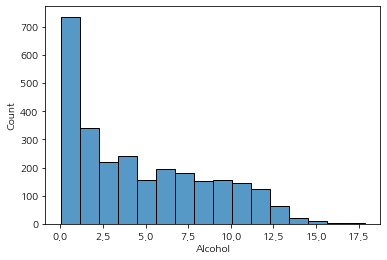

In [54]:
# 알코올 데이터 분포도
sns.histplot(df_alcohol['Alcohol'], bins=16)
plt.show()

In [55]:
# 알코올 기준 정렬
df_alcohol.sort_values(by=['Alcohol'],ascending=True)

,Country,Year,Life expectancy,Alcohol
0,Afghanistan,2015,65.0,0.01
1976,Papua New Guinea,2014,62.7,0.01
1977,Papua New Guinea,2013,62.4,0.01
1978,Papua New Guinea,2012,62.2,0.01
1399,Kuwait,2010,74.0,0.01
...,...,...,...,...
227,Belarus,2012,71.9,16.35
875,Estonia,2006,73.0,16.58
873,Estonia,2008,74.2,16.99
228,Belarus,2011,72.0,17.31


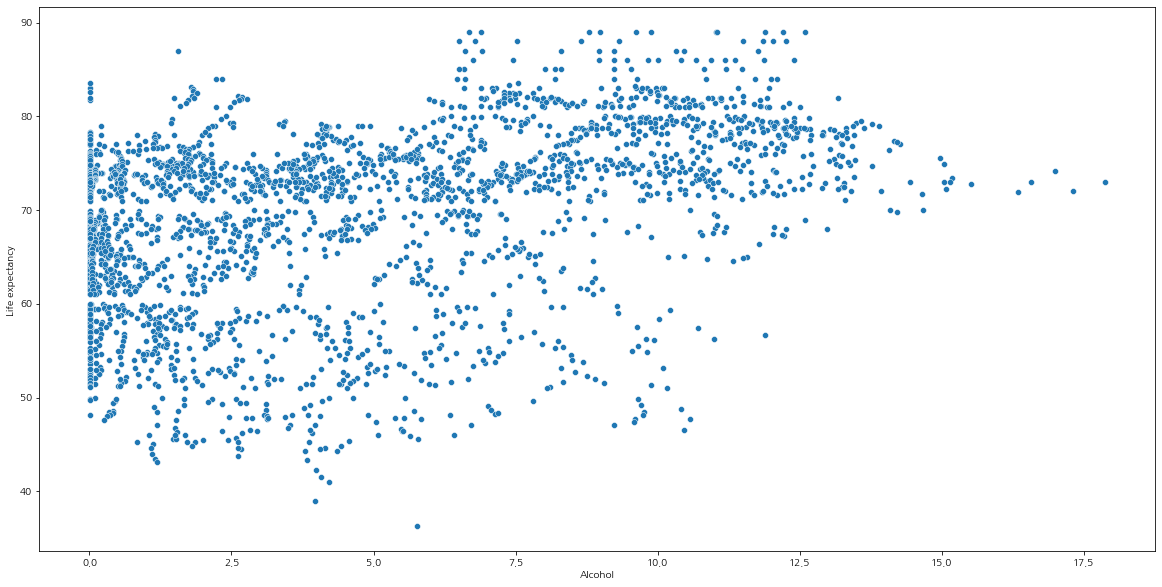

In [60]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df_alcohol['Alcohol'],y=df_alcohol['Life expectancy '],data=df)
plt.show()

### 순수 알코올 섭취(15L이상)한 사람의 비율이 많으면 기대수명에 영향을 주는것 같지만 큰 상관은 없다. 알코올보다는 다른 요인이 기대수명의 영향을 많이 끼친다.